# Pre-processing data for Neural Nets 

Pre-processing is the series of modifications on data that modify the performance of the network you want to train or model you want to test. 

In this Notebook, we will compare the results of different ways to preprocess data in order to train and evaluate Neural Networks. For this project, we will use as a baseline model a CNN to predict numbers from the MNIST dataset. 

We start by importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils

/home/deepcbd/env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


The following method loads and does some necessary manipulation on our data.

In [2]:
def load_data():
    # load data
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    # reshape to be [samples][width][height][channels]
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    
    #One-hot encoding
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    return (X_train, y_train, X_test, y_test, num_classes)

The following method returns the CNN baseline model.

In [3]:
def makeModel(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Case 1:
We know our data is between 0 and 255. We will rescale the features to [0,1].

In [4]:
(X_train, y_train, X_test, y_test, num_classes) = load_data()

In [5]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.
X_test = X_test / 255.
print(X_train.shape)

(60000, 28, 28, 1)


In [7]:
model1 = makeModel(num_classes)
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200, verbose=0)

In [8]:
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Case 1 Error: %.2f%%" % (100-scores[1]*100))

Case 1 Error: 1.05%


# Case 2:
We know our data is between 0 and 255. We will rescale the features to [-1,1].

In [8]:
(X_train, y_train, X_test, y_test, num_classes) = load_data()

# normalize inputs from 0-255 to [-1,1]
X_train = (X_train / 128) -1.
X_test = (X_test / 128) -1.
print(X_train.shape)

(60000, 28, 28, 1)


In [9]:
model2 = makeModel(num_classes)
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 4s - loss: 0.2059 - acc: 0.9400 - val_loss: 0.0768 - val_acc: 0.9746
Epoch 2/100
 - 4s - loss: 0.0681 - acc: 0.9794 - val_loss: 0.0549 - val_acc: 0.9823
Epoch 3/100
 - 4s - loss: 0.0477 - acc: 0.9851 - val_loss: 0.0437 - val_acc: 0.9853
Epoch 4/100
 - 4s - loss: 0.0380 - acc: 0.9879 - val_loss: 0.0383 - val_acc: 0.9872
Epoch 5/100
 - 4s - loss: 0.0303 - acc: 0.9907 - val_loss: 0.0400 - val_acc: 0.9873
Epoch 6/100
 - 3s - loss: 0.0271 - acc: 0.9907 - val_loss: 0.0371 - val_acc: 0.9880
Epoch 7/100
 - 3s - loss: 0.0200 - acc: 0.9933 - val_loss: 0.0331 - val_acc: 0.9902
Epoch 8/100
 - 3s - loss: 0.0172 - acc: 0.9943 - val_loss: 0.0353 - val_acc: 0.9888
Epoch 9/100
 - 4s - loss: 0.0138 - acc: 0.9957 - val_loss: 0.0352 - val_acc: 0.9891
Epoch 10/100
 - 4s - loss: 0.0130 - acc: 0.9958 - val_loss: 0.0344 - val_acc: 0.9891
Epoch 11/100
 - 4s - loss: 0.0116 - acc: 0.9960 - val_loss: 0.0384 - val_acc: 0.9882
Epoch 12/100
 - 4s - los

Epoch 97/100
 - 3s - loss: 0.0015 - acc: 0.9996 - val_loss: 0.0700 - val_acc: 0.9908
Epoch 98/100
 - 4s - loss: 9.7096e-04 - acc: 0.9997 - val_loss: 0.0695 - val_acc: 0.9889
Epoch 99/100
 - 3s - loss: 0.0018 - acc: 0.9995 - val_loss: 0.0840 - val_acc: 0.9886
Epoch 100/100
 - 4s - loss: 0.0017 - acc: 0.9996 - val_loss: 0.0679 - val_acc: 0.9904


In [10]:
scores = model2.evaluate(X_test, y_test, verbose=0)
print("Case 2 Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 0.96%


# Case 3
We know our data is between 0 and 255. We won't change the interval.

In [11]:
(X_train, y_train, X_test, y_test, num_classes) = load_data()

print(X_train.shape)

(60000, 28, 28, 1)


In [12]:
model3 = makeModel(num_classes)
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200, verbose=0)

In [13]:
scores = model3.evaluate(X_test, y_test, verbose=0)
print("Case 3 Error: %.2f%%" % (100-scores[1]*100))

Case 3 Error: 11.81%


# Case 4

Normalization (or Standarization) means substracting the mean value and dividing by the variance (zero mean and unit variance). Another similar for option normalization would be the same but replacing the variance for the standart deviaton.

We must remark that this technique is more useful when the range of data is unknown a priori. Also, it is a very good method when the different input features take different intervals. Even though this is not our case, and it might not be the optimal option, we made the experiment as an example of data preprocessing for another situation and, of course, to prove what we expect.

In [14]:
(X_train, y_train, X_test, y_test, num_classes) = load_data()

X_train = (X_train - X_train.mean()) / X_train.var()
X_test = (X_test - X_test.mean()) / X_test.var()

print(X_train.shape)

(60000, 28, 28, 1)


In [15]:
model4 = makeModel(num_classes)
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200, verbose=0)

In [16]:
scores = model4.evaluate(X_test, y_test, verbose=0)
print("Case 4 Error: %.2f%%" % (100-scores[1]*100))

Case 4 Error: 1.05%


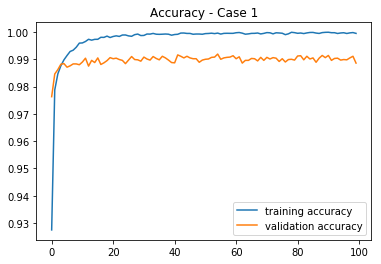

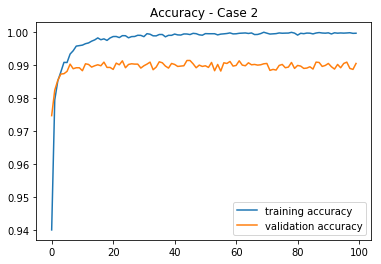

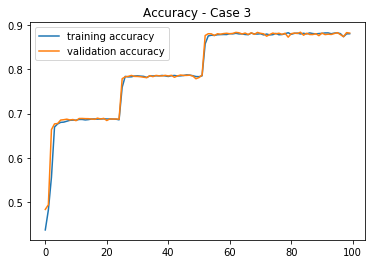

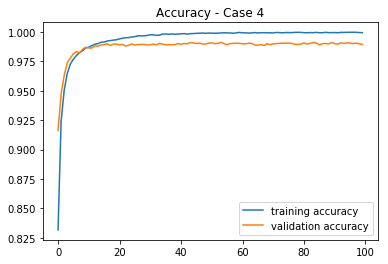

In [17]:
plt.plot(history1.history['acc'], label='training accuracy')
plt.plot(history1.history['val_acc'], label='validation accuracy')
plt.legend()
plt.title("Accuracy - Case 1")
plt.show()

plt.plot(history2.history['acc'], label='training accuracy')
plt.plot(history2.history['val_acc'], label='validation accuracy')
plt.legend()
plt.title("Accuracy - Case 2")
plt.show()

plt.plot(history3.history['acc'], label='training accuracy')
plt.plot(history3.history['val_acc'], label='validation accuracy')
plt.legend()
plt.title("Accuracy - Case 3")
plt.show()

plt.plot(history4.history['acc'], label='training accuracy')
plt.plot(history4.history['val_acc'], label='validation accuracy')
plt.legend()
plt.title("Accuracy - Case 4")
plt.show()

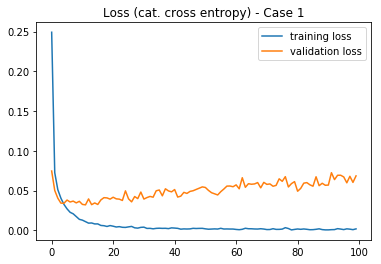

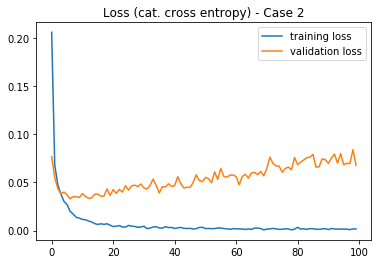

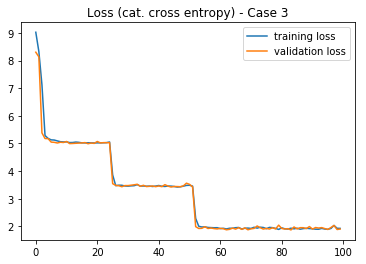

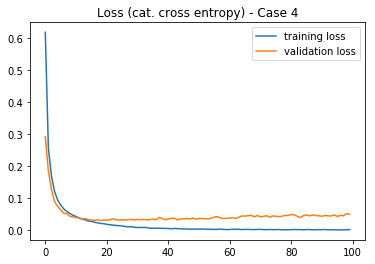

In [18]:
plt.plot(history1.history['loss'], label='training loss')
plt.plot(history1.history['val_loss'], label='validation loss')
plt.title('Loss (cat. cross entropy) - Case 1')
plt.legend()
plt.show()

plt.plot(history2.history['loss'], label='training loss')
plt.plot(history2.history['val_loss'], label='validation loss')
plt.title('Loss (cat. cross entropy) - Case 2')
plt.legend()
plt.show()

plt.plot(history3.history['loss'], label='training loss')
plt.plot(history3.history['val_loss'], label='validation loss')
plt.title('Loss (cat. cross entropy) - Case 3')
plt.legend()
plt.show()

plt.plot(history4.history['loss'], label='training loss')
plt.plot(history4.history['val_loss'], label='validation loss')
plt.title('Loss (cat. cross entropy) - Case 4')
plt.legend()
plt.show()

# Conclusions

The graphs above show the evolution of training and validation accuracy and loss throughout the epochs and for the different types of data preprocessing.

As we can observe, the most different graph is the one in Case 3. We can see that some of the steps made by SDG are significanly larger than others in some particular epochs. We can relate this to the fact that the values of the input features are much higher that in the other three cases, since we didn't rescale these values.

Finally, if we have a look at the errors obtained in the 4 different cases, we can reach the conclusion that preprocessing is an hyperparamater that we have to take into account seriously in order to guarantee good results. As wee see, when we normalize the data we obtain an error arround 1%, however when we just give the data to the neural netwrok without a previous modification the error is almost 12 times higher (11.81%)